<a href="https://colab.research.google.com/github/gabriel-schineider/DataScience_Challenge_TelecomX-pt2/blob/main/DaSc_TelecomX_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparação dos dados para posterior criação dos modelos

##Importando a base de dados

In [515]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [516]:
url = 'https://raw.githubusercontent.com/gabriel-schineider/DataScience_Challenge_TelecomX-pt2/refs/heads/main/df_para_ml.csv'

In [517]:
df = pd.read_csv(url)

In [518]:
df

,Churn,customer.tenure,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Total,account.Charges.Monthly,account.Charges.Daily
0,No,9,Female,0,Yes,Yes,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,593.30,65.60,2.20
1,No,9,Male,0,No,No,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,542.40,59.90,2.01
2,Yes,4,Male,0,No,No,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,280.85,73.90,2.34
3,Yes,13,Male,1,Yes,No,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1237.85,98.00,3.17
4,Yes,3,Female,1,Yes,No,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,267.40,83.90,2.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,No,13,Female,0,No,No,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,742.90,55.15,1.90
7028,Yes,22,Male,0,Yes,No,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,1873.70,85.10,2.84
7029,No,2,Male,0,No,No,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,92.75,50.30,1.55
7030,No,67,Male,0,Yes,Yes,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,4627.65,67.85,2.30


##Fazendo o encoding

In [519]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7032 non-null   object 
 1   customer.tenure            7032 non-null   int64  
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   phone.PhoneService         7032 non-null   object 
 7   phone.MultipleLines        7032 non-null   object 
 8   internet.InternetService   7032 non-null   object 
 9   internet.OnlineSecurity    7032 non-null   object 
 10  internet.OnlineBackup      7032 non-null   object 
 11  internet.DeviceProtection  7032 non-null   object 
 12  internet.TechSupport       7032 non-null   object 
 13  internet.StreamingTV       7032 non-null   objec

In [520]:
df.isna().sum()

,0
Churn,0
customer.tenure,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0
internet.OnlineSecurity,0


In [521]:
df.columns

Index(['Churn', 'customer.tenure', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
       'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Total', 'account.Charges.Monthly',
       'account.Charges.Daily'],
      dtype='object')

In [522]:
df.nunique()

,0
Churn,2
customer.tenure,72
customer.gender,2
customer.SeniorCitizen,2
customer.Partner,2
customer.Dependents,2
phone.PhoneService,2
phone.MultipleLines,3
internet.InternetService,3
internet.OnlineSecurity,3


In [523]:
listinha = []
c=0
for col in df.columns:
  if df[col].nunique() < 4:
    print(f'{col} - {df[col].unique()}')
    listinha.append(col)
    print('-'*10)
    c += 1

listinha.remove('customer.gender')
listinha.remove('internet.InternetService')
listinha.remove('account.Contract')

print(f'qnt: {c}\nlen list: {len(listinha)}')

Churn - ['No' 'Yes']
----------
customer.gender - ['Female' 'Male']
----------
customer.SeniorCitizen - [0 1]
----------
customer.Partner - ['Yes' 'No']
----------
customer.Dependents - ['Yes' 'No']
----------
phone.PhoneService - ['Yes' 'No']
----------
phone.MultipleLines - ['No' 'Yes' 'No phone service']
----------
internet.InternetService - ['DSL' 'Fiber optic' 'No']
----------
internet.OnlineSecurity - ['No' 'Yes' 'No internet service']
----------
internet.OnlineBackup - ['Yes' 'No' 'No internet service']
----------
internet.DeviceProtection - ['No' 'Yes' 'No internet service']
----------
internet.TechSupport - ['Yes' 'No' 'No internet service']
----------
internet.StreamingTV - ['Yes' 'No' 'No internet service']
----------
internet.StreamingMovies - ['No' 'Yes' 'No internet service']
----------
account.Contract - ['One year' 'Month-to-month' 'Two year']
----------
account.PaperlessBilling - ['Yes' 'No']
----------
qnt: 16
len list: 13


In [524]:
list_to_change = []
cc = 0

for col in df.columns:
  if df[col].nunique() == 3:
    print(f'{col} - {df[col].unique()}')
    list_to_change.append(col)
    print('-'*10)
    cc += 1

list_to_change.remove('internet.InternetService')
list_to_change.remove('account.Contract')

print(f'qnt: {cc}\nlen list: {len(list_to_change)}')

phone.MultipleLines - ['No' 'Yes' 'No phone service']
----------
internet.InternetService - ['DSL' 'Fiber optic' 'No']
----------
internet.OnlineSecurity - ['No' 'Yes' 'No internet service']
----------
internet.OnlineBackup - ['Yes' 'No' 'No internet service']
----------
internet.DeviceProtection - ['No' 'Yes' 'No internet service']
----------
internet.TechSupport - ['Yes' 'No' 'No internet service']
----------
internet.StreamingTV - ['Yes' 'No' 'No internet service']
----------
internet.StreamingMovies - ['No' 'Yes' 'No internet service']
----------
account.Contract - ['One year' 'Month-to-month' 'Two year']
----------
qnt: 9
len list: 7


In [525]:
for coluna in list_to_change:
  df[coluna] = df[coluna].replace({'No internet service': 'No', 'No phone service': 'No'})

for coluna in df.columns:
  if df[coluna].nunique() < 4:
    print(f'{coluna} - {df[coluna].unique()}')

Churn - ['No' 'Yes']
customer.gender - ['Female' 'Male']
customer.SeniorCitizen - [0 1]
customer.Partner - ['Yes' 'No']
customer.Dependents - ['Yes' 'No']
phone.PhoneService - ['Yes' 'No']
phone.MultipleLines - ['No' 'Yes']
internet.InternetService - ['DSL' 'Fiber optic' 'No']
internet.OnlineSecurity - ['No' 'Yes']
internet.OnlineBackup - ['Yes' 'No']
internet.DeviceProtection - ['No' 'Yes']
internet.TechSupport - ['Yes' 'No']
internet.StreamingTV - ['Yes' 'No']
internet.StreamingMovies - ['No' 'Yes']
account.Contract - ['One year' 'Month-to-month' 'Two year']
account.PaperlessBilling - ['Yes' 'No']


In [526]:
# preferi fazer da outra maneira, não desta:

# for coluna in listinha:
#   df[coluna] = df[coluna].replace({'No': 0, 'Yes': 1})

# df.head(2)

In [527]:
colunas_categoricas = df.select_dtypes(include='object').columns
print(colunas_categoricas)

Index(['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod'],
      dtype='object')


In [528]:
df_encoded = pd.get_dummies(data=df, columns=colunas_categoricas, dtype=int, drop_first=True)
df = df_encoded
df.head()

,customer.tenure,customer.SeniorCitizen,account.Charges.Total,account.Charges.Monthly,account.Charges.Daily,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,9,0,593.30,65.6,2.20,0,0,1,1,1,...,0,1,1,0,1,0,1,0,0,1
1,9,0,542.40,59.9,2.01,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,4,0,280.85,73.9,2.34,1,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
3,13,1,1237.85,98.0,3.17,1,1,1,0,1,...,1,0,1,1,0,0,1,0,1,0
4,3,1,267.40,83.9,2.97,1,0,1,0,1,...,0,1,1,0,0,0,1,0,0,1


In [529]:
df.columns

Index(['customer.tenure', 'customer.SeniorCitizen', 'account.Charges.Total',
       'account.Charges.Monthly', 'account.Charges.Daily', 'Churn_Yes',
       'customer.gender_Male', 'customer.Partner_Yes',
       'customer.Dependents_Yes', 'phone.PhoneService_Yes',
       'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic',
       'internet.InternetService_No', 'internet.OnlineSecurity_Yes',
       'internet.OnlineBackup_Yes', 'internet.DeviceProtection_Yes',
       'internet.TechSupport_Yes', 'internet.StreamingTV_Yes',
       'internet.StreamingMovies_Yes', 'account.Contract_One year',
       'account.Contract_Two year', 'account.PaperlessBilling_Yes',
       'account.PaymentMethod_Credit card (automatic)',
       'account.PaymentMethod_Electronic check',
       'account.PaymentMethod_Mailed check'],
      dtype='object')

In [530]:
df.isnull().sum()

,0
customer.tenure,0
customer.SeniorCitizen,0
account.Charges.Total,0
account.Charges.Monthly,0
account.Charges.Daily,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.tenure                                7032 non-null   int64  
 1   customer.SeniorCitizen                         7032 non-null   int64  
 2   account.Charges.Total                          7032 non-null   float64
 3   account.Charges.Monthly                        7032 non-null   float64
 4   account.Charges.Daily                          7032 non-null   float64
 5   Churn_Yes                                      7032 non-null   int64  
 6   customer.gender_Male                           7032 non-null   int64  
 7   customer.Partner_Yes                           7032 non-null   int64  
 8   customer.Dependents_Yes                        7032 non-null   int64  
 9   phone.PhoneService_Yes                         7032 

##Fazendo a correlação

In [532]:
corr = df.corr()

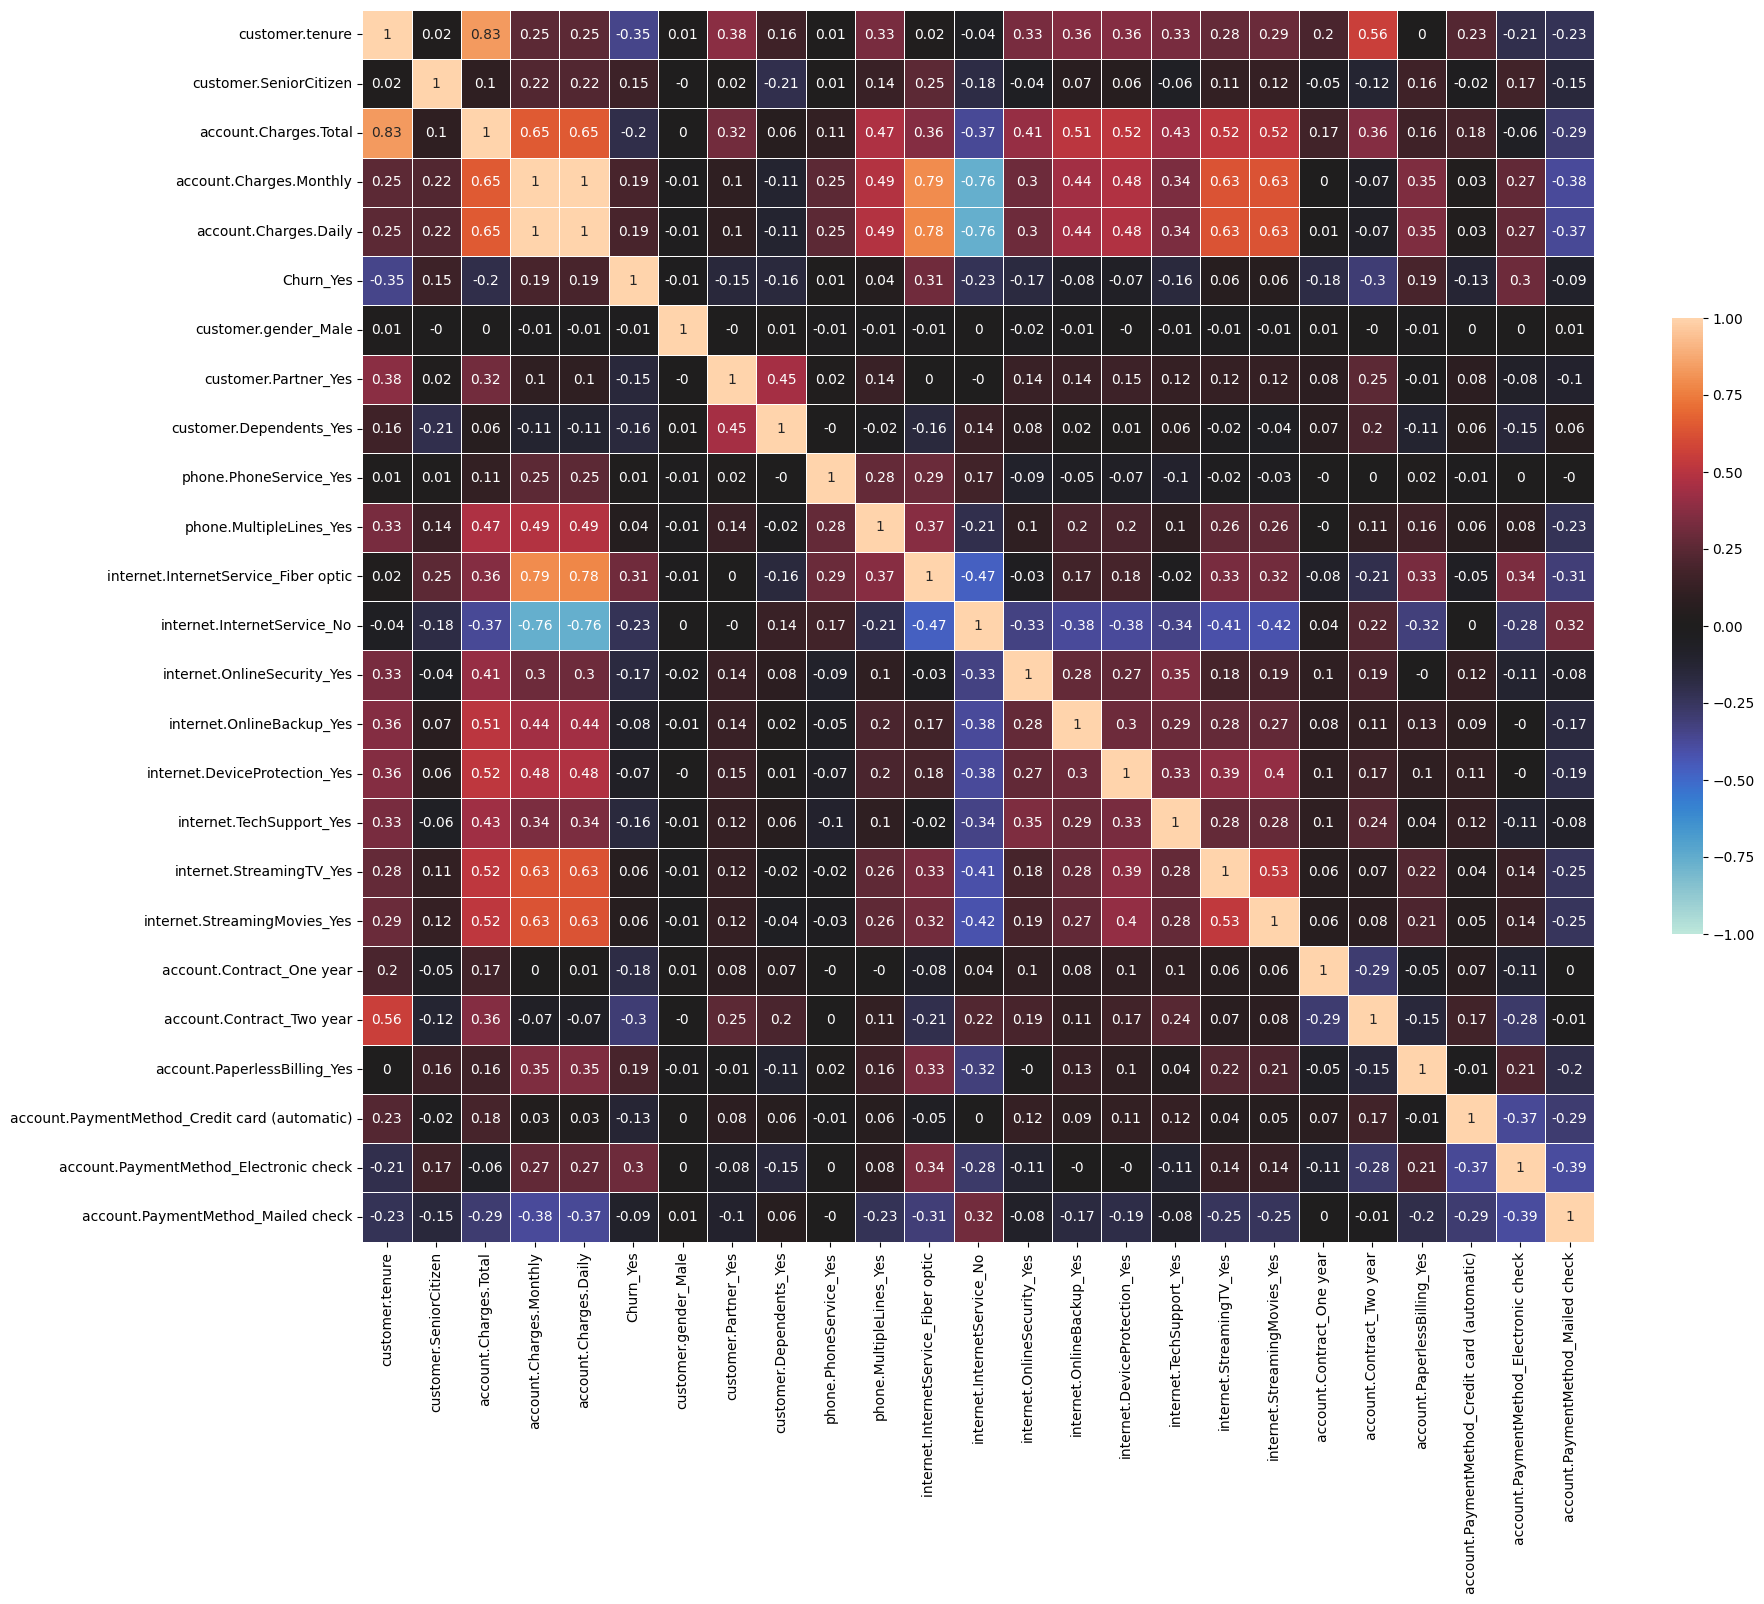

In [533]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr,2), vmin=-1, vmax=1, center=0,
                 square=True, linewidths= .5, annot=True, cbar_kws={'shrink': .5})
plt.show()

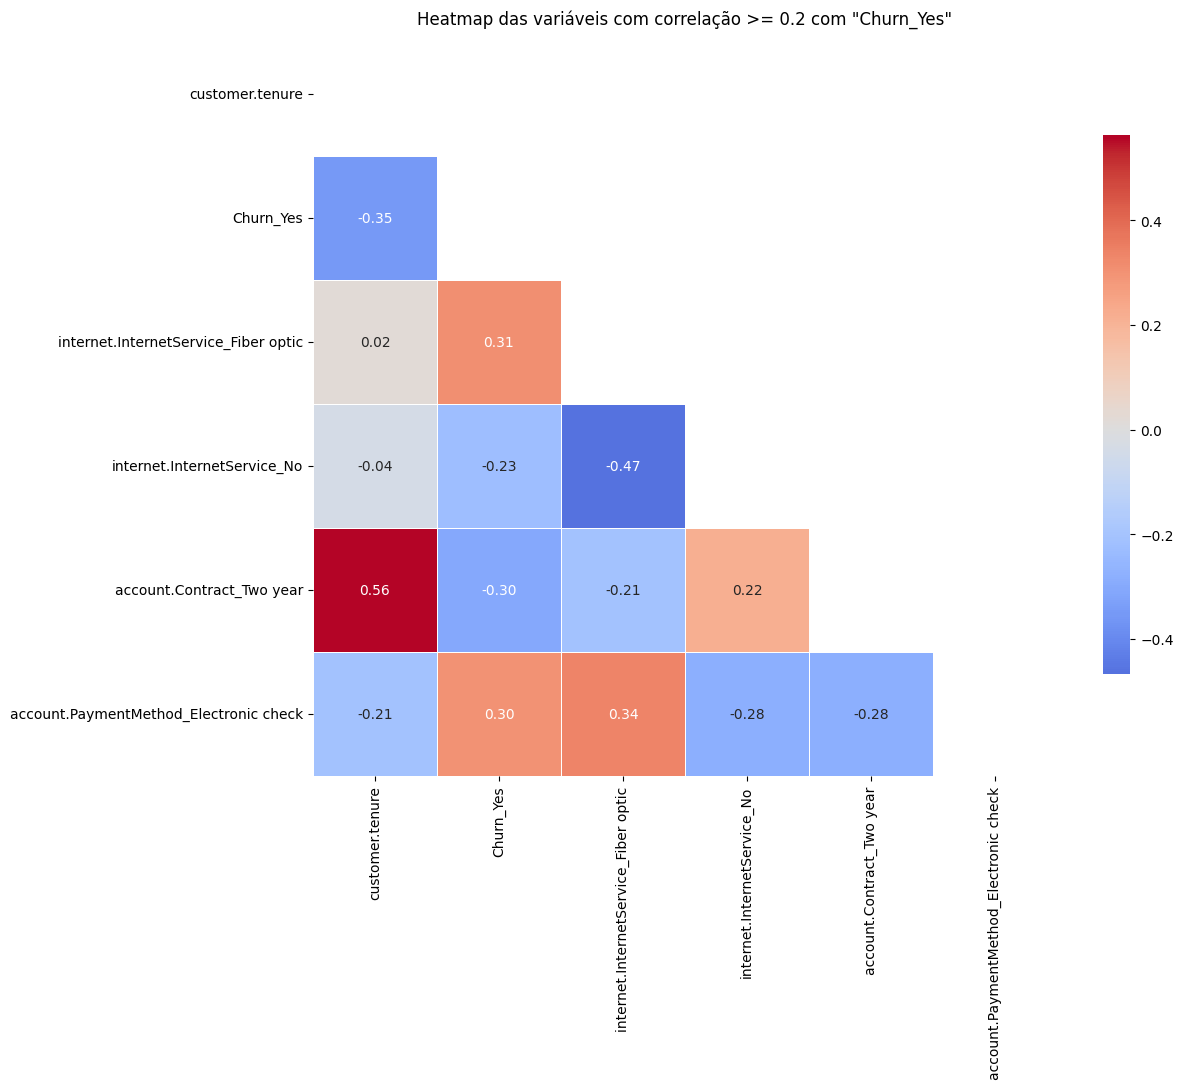

In [534]:
target_var = 'Churn_Yes'


limiar = 0.2


variaveis_relevantes = corr.index[abs(corr[target_var]) >= limiar].tolist()


if target_var not in variaveis_relevantes:
    variaveis_relevantes.append(target_var)


corr_filtrada = corr.loc[variaveis_relevantes, variaveis_relevantes]


mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))


plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{target_var}"')
plt.show()

##Filtrando os dados para a posterior separação de Treino x Teste

In [535]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df.drop(columns=['Churn_Yes'])

In [536]:
X_const = add_constant(X)

In [537]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]


display(vif_data.sort_values(by='VIF', ascending=False))

,feature,VIF
4,account.Charges.Monthly,992.623632
0,const,629.310533
11,internet.InternetService_Fiber optic,148.504277
5,account.Charges.Daily,133.792125
12,internet.InternetService_No,104.217179
9,phone.PhoneService_Yes,34.895768
18,internet.StreamingMovies_Yes,24.158588
17,internet.StreamingTV_Yes,24.080021
3,account.Charges.Total,10.871350
1,customer.tenure,7.613525


In [538]:
# Filtragem 1


X_filtered = X_const.copy()


X_filtered.drop(columns=["account.Charges.Daily"], inplace=True)


X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)


X_filtered = X_filtered.astype(float)


vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]


display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,38.968665
4,account.Charges.Monthly,22.872213
3,account.Charges.Total,10.803153
10,internet.InternetService_Fiber optic,7.658029
1,customer.tenure,7.583667
18,account.Contract_Two year,2.648624
16,internet.StreamingMovies_Yes,2.458872
15,internet.StreamingTV_Yes,2.437465
21,account.PaymentMethod_Electronic check,1.975617
14,internet.TechSupport_Yes,1.884392


In [539]:
# Filtragem 2

X_final = X_filtered.drop(columns=["account.Charges.Total"])


vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]


display(vif_data_final.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,31.336459
3,account.Charges.Monthly,22.336364
9,internet.InternetService_Fiber optic,7.553029
1,customer.tenure,2.826562
17,account.Contract_Two year,2.630079
15,internet.StreamingMovies_Yes,2.417444
14,internet.StreamingTV_Yes,2.399620
20,account.PaymentMethod_Electronic check,1.973257
13,internet.TechSupport_Yes,1.848965
21,account.PaymentMethod_Mailed check,1.837626


##Treino x Teste

In [540]:
# Criando treino vs teste

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [541]:
# Separando treino de teste

X = df.drop(columns=['Churn_Yes'])
y = df['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [542]:
# Normalizando

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [543]:
# Balanciando

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)


df_balanceado = pd.DataFrame(X_train_bal)
df_balanceado.insert(0, 'Churn_Yes', y_train_bal)
df_balanceado


df_balanceado['Churn_Yes'].value_counts(normalize=True)

,proportion
Churn_Yes,
1,0.5
0,0.5


# Criação e Análise dos modelos

##Modelos

In [544]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [545]:
# Regressão Logística

# Instanciar e treinar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Resultados - Regressão Logística")
print("\nAcurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr), "\n")
print(classification_report(y_test, y_pred_lr))

Resultados - Regressão Logística

Acurácia: 0.7511848341232228
ROC AUC: 0.8453639804416396
Matriz de Confusão:
 [[1131  418]
 [ 107  454]] 

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1549
           1       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



In [546]:
# Random Forest

# Instanciar e treinar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Resultados - Random Forest")
print("\nAcurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf), "\n")
print(classification_report(y_test, y_pred_rf))

Resultados - Random Forest

Acurácia: 0.7796208530805687
ROC AUC: 0.8216266258836418
Matriz de Confusão:
 [[1308  241]
 [ 224  337]] 

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1549
           1       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



In [547]:
# Gradient Boosting Classifier

# Instanciar e treinar
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_gb = gb.predict(X_test_scaled)
y_prob_gb = gb.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Resultados - Gradient Boosting Classifier")
print("\nAcurácia:", accuracy_score(y_test, y_pred_gb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_gb))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_gb), "\n")
print(classification_report(y_test, y_pred_gb))

Resultados - Gradient Boosting Classifier

Acurácia: 0.7720379146919432
ROC AUC: 0.8414001788285006
Matriz de Confusão:
 [[1256  293]
 [ 188  373]] 

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1549
           1       0.56      0.66      0.61       561

    accuracy                           0.77      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.77      0.78      2110



In [548]:
# Support Vector Machine

# Instanciar e treinar
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Resultados - Support Vector Machine")
print("\nAcurácia:", accuracy_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, y_prob_svm))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_svm), "\n")
print(classification_report(y_test, y_pred_svm))

Resultados - Support Vector Machine

Acurácia: 0.7545023696682465
ROC AUC: 0.8226364200237288
Matriz de Confusão:
 [[1196  353]
 [ 165  396]] 

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1549
           1       0.53      0.71      0.60       561

    accuracy                           0.75      2110
   macro avg       0.70      0.74      0.71      2110
weighted avg       0.79      0.75      0.76      2110



In [549]:
# K-Nearest Neighbors (KNN)

# Instanciar e treinar
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Resultados - K-Nearest Neighbors")
print("\nAcurácia:", accuracy_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_prob_knn))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_knn), "\n")
print(classification_report(y_test, y_pred_knn))

Resultados - K-Nearest Neighbors

Acurácia: 0.6919431279620853
ROC AUC: 0.7540912485658622
Matriz de Confusão:
 [[1047  502]
 [ 148  413]] 

              precision    recall  f1-score   support

           0       0.88      0.68      0.76      1549
           1       0.45      0.74      0.56       561

    accuracy                           0.69      2110
   macro avg       0.66      0.71      0.66      2110
weighted avg       0.76      0.69      0.71      2110



In [550]:
# Decision Tree

# Instanciar e treinar
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Resultados - Decision Tree")
print("\nAcurácia:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_prob_dt))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_dt), "\n")
print(classification_report(y_test, y_pred_dt))

Resultados - Decision Tree

Acurácia: 0.7350710900473933
ROC AUC: 0.686973598054751
Matriz de Confusão:
 [[1224  325]
 [ 234  327]] 

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1549
           1       0.50      0.58      0.54       561

    accuracy                           0.74      2110
   macro avg       0.67      0.69      0.68      2110
weighted avg       0.75      0.74      0.74      2110



##Análise dos modelos

###1. Objetivo da Análise

Avaliar e comparar diferentes modelos de machine learning para prever o cancelamento de clientes (churn), identificando aquele que oferece o melhor equilíbrio entre desempenho e aplicabilidade, com foco especial na redução de falsos negativos.

###2. Modelos Avaliados

* Regressão Logística
* Gradient Boosting Classifier
* Random Forest
* Máquina de Vetores de Suporte (SVM)



Obs: os modelos "KNN" e "Árvore de Decisão" foram descartados devido os baixos resultados que obtiveram.

###3. Principais Métricas Avaliadas

* Accuracy - Proporção total de acertos (mas pode mascarar erros em classes desbalanceadas)

* ROC AUC - Capacidade de distinguir entre clientes que cancelam e os que permanecem

* Precision - Proporção de previsões positivas que estavam corretas (evita falsos positivos)

* Recall - Capacidade de identificar corretamente os clientes que realmente cancelariam

* F1-score - Média harmônica entre precision e recall – útil para cenários desbalanceados


###4. Resultados Comparativos (Resumo)

|Model|Accuracy|ROC AUC|Precision|Recall|F1-score|
|---|---|---|---|---|---|
|Logistic Regression|0\.7512|0\.8454|0\.52|0\.81|0\.63|
|Random Forest|0\.7796|0\.8216|0\.58|0\.6|0\.59|
|Gradient Boosting Classifier|0\.772|0\.8414|0\.56|0\.66|0\.61|
|Support Vector Machine|0\.755|0\.823|0\.53|0\.81|0\.64|

###5. Interpretação Estratégica

+ Recall elevado (0.81) foi atingido por Regressão Logística e SVM, o que é essencial para minimizar falsos negativos – ou seja, evitar deixar de identificar clientes que estão prestes a cancelar.

+ ROC AUC mais alto pertence à Regressão Logística (0.8454), indicando sua excelente capacidade de discriminação entre classes.

+ SVM apresenta o melhor F1-score (0.64), revelando um ótimo equilíbrio entre precisão e recall.

+ Random Forest obteve a maior acurácia (0.7796) e maior precision (0.58), mas seu recall foi o mais baixo (0.60) — um fator de risco quando o objetivo é reter clientes.

###6. Recomendação Final

#### Modelos recomendados para previsão de churn:

+ Regressão Logística:

Melhor em ROC AUC (discriminação entre classes)

Alto Recall, ideal para identificar clientes em risco

Modelo simples, robusto e fácil de interpretar

+ Support Vector Machine (SVM):

Recall elevado (igual à Regressão Logística)

Maior F1-score, indicando equilíbrio entre sensibilidade e precisão

Levemente superior em desempenho geral quando priorizamos balanceamento

###7. Conclusão Estratégica

A escolha entre os modelos depende dos objetivos do negócio:

Se o foco for explicabilidade e capacidade de separação clara entre evasores e não evasores, a Regressão Logística é ideal.

Se a prioridade for o equilíbrio entre acertos e erros, com bom desempenho geral em todas as métricas, a SVM é a escolha.

Ambos os modelos são altamente recomendáveis para implementação e podem ser testados em produção com monitoramento contínuo.

Assim, como o foco é indentificar os evasores, prosseguiremos com o modelo de Regressão Logística.

##Explicitação dos fatores que mais influenciam a evasão

In [558]:
# Obter os coeficientes do modelo de Regressão Logística
# Como o modelo foi treinado com X_train_bal, precisamos obter os nomes das colunas correspondentes
# do DataFrame original X_train para associar aos coeficientes.

# Obter os nomes das colunas de X_train (antes do balanceamento e escalonamento)
feature_names = X_train.columns

# Obter os coeficientes do modelo treinado
# O coeficiente de intercepção (bias) é lr.intercept_[0]
# Os coeficientes das features são lr.coef_[0]
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr.coef_[0]
})

# Adicionar o coeficiente de intercepção
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [lr.intercept_[0]]})
coefficients = pd.concat([coefficients, intercept_df], ignore_index=True)

# Exibir os coeficientes ordenados pelo valor absoluto para destacar os mais influentes
display(coefficients.reindex(coefficients['Coefficient'].abs().sort_values(ascending=False).index))

,Feature,Coefficient
0,customer.tenure,-1.569059
2,account.Charges.Total,0.901791
24,Intercept,-0.838549
3,account.Charges.Monthly,-0.787092
10,internet.InternetService_Fiber optic,0.773089
11,internet.InternetService_No,-0.631162
19,account.Contract_Two year,-0.621076
18,account.Contract_One year,-0.342635
16,internet.StreamingTV_Yes,0.260807
17,internet.StreamingMovies_Yes,0.218034


/tmp/ipython-input-3566130352.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Abs_Coefficient', y='Feature', data=coefficients_features, palette='viridis')


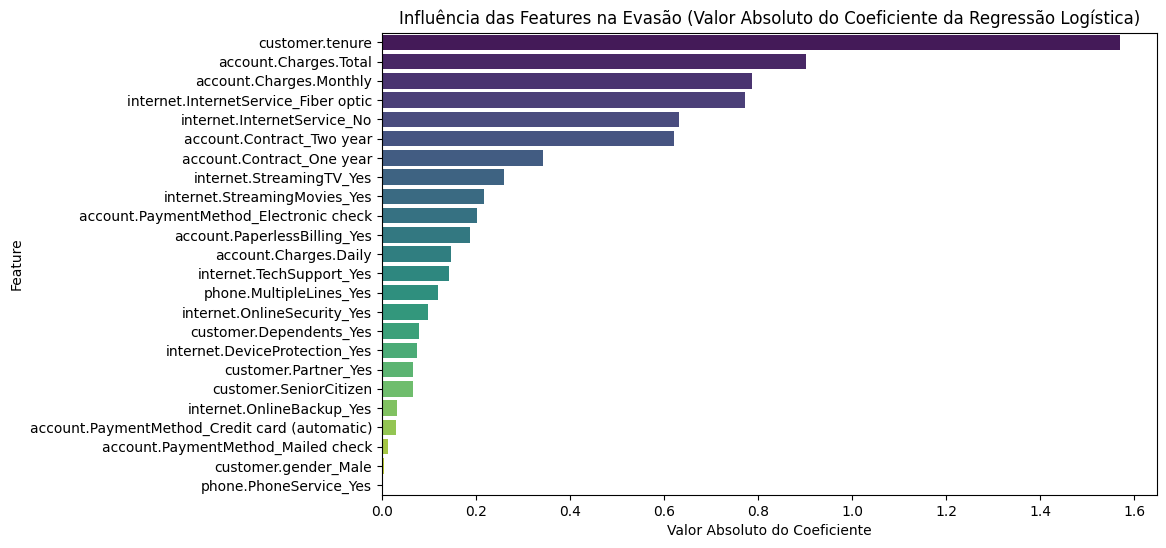

In [557]:
# Excluir o intercepto para visualização das features
coefficients_features = coefficients[coefficients['Feature'] != 'Intercept'].copy()

# Ordenar por valor absoluto do coeficiente
coefficients_features['Abs_Coefficient'] = coefficients_features['Coefficient'].abs()
coefficients_features = coefficients_features.sort_values(by='Abs_Coefficient', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=coefficients_features, palette='viridis')
plt.title('Influência das Features na Evasão (Valor Absoluto do Coeficiente da Regressão Logística)')
plt.xlabel('Valor Absoluto do Coeficiente')
plt.ylabel('Feature')
plt.show()

#Conclusão da evasão de clientes

## 1. Introdução

O presente relatório tem como objetivo destacar os principais fatores que influenciam a evasão de clientes, com base nos coeficientes obtidos através do modelo de Regressão Logística — o modelo selecionado por apresentar bons resultados e estar mais sincronizado com os interesses da TelecomX.

Em seguida, são propostas estratégias de retenção alinhadas aos fatores identificados.

## 2. Principais Fatores que Influenciam a Evasão

Os coeficientes abaixo representam a influência de cada variável de evasão:

* Coeficientes positivos indicam maior chance de evasão.

* Coeficientes negativos indicam menor chance de evasão (fator de retenção).

---


| Fator                                       | Coeficiente         | Interpretação                                                                                                        |
| ------------------------------------------- | ------------------- | -------------------------------------------------------------------------------------------------------------------- |
| **Tempo de vínculo (tenure)**               | **-1.569**          | Quanto maior o tempo de contrato do cliente, menor a chance de evasão.                                               |
| **Cobrança total (Charges.Total)**          | **+0.902**          | Clientes com valores acumulados altos tendem a evadir mais.                                                          |
| **Cobrança mensal (Charges.Monthly)**       | **-0.787**          | Valores mensais maiores reduzem a evasão. Pode indicar usuários com serviços mais completos.     |
| **Serviço de Internet: Fibra óptica**       | **+0.773**          | Usuários com fibra óptica têm maior chance de evasão — pode indicar insatisfação com o custo ou com a qualidade percebida. |
| **Tipo de contrato: Dois anos**             | **-0.621**          | Reduz fortemente a evasão. Contratos longos aumentam o comprometimento.                                              |
| **Suporte técnico ativo (TechSupport)**     | **-0.144**          | A disponibilidade de suporte técnico está associada à retenção.                                                      |
| **Serviços de Streaming**     | **+0.260** | Podem indicar clientes que experimentam mais serviços, mas não necessariamente permanecem.                           |
| **Pagamento via débito eletrônico**         | **+0.203**          | Este método de pagamento está associado a maior evasão.                                                              |
| **Faturamento digital (PaperlessBilling)**  | **+0.188**          | Pode sugerir clientes mais propensos a cancelamentos autônomos.                                                      |
| **Idosos (SeniorCitizen)**                  | **+0.066**          | Leve aumento na evasão entre idosos, talvez por dificuldades técnicas ou financeiras.                                |
| **Segurança online ativa (OnlineSecurity)** | **-0.098**          | Um fator de retenção. Sentimento de proteção contribui para a fidelidade.                                            |


##3. Propostas de Estratégias de Retenção

Com base nos fatores acima, propomos as seguintes ações:



---


| Fator                                          | Estratégia de Retenção                                                                                                  |
| ---------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------- |
| **Tempo de vínculo (tenure)**                  | Criar programas de fidelidade com **benefícios progressivos ao longo do tempo**.                                        |
| **Cobrança total (Charges.Total)**             | Oferecer **planos personalizados** ou **descontos para clientes com alta fatura acumulada**.                            |
| **Cobrança mensal (Charges.Monthly)**          | Comunicar claramente o **valor agregado dos planos mais completos** (com mais benefícios).                              |
| **Fibra óptica**                               | Avaliar **satisfação dos clientes com fibra óptica** e revisar o **custo-benefício percebido**.                         |
| **Contrato de dois anos**                      | Incentivar contratos de longo prazo com **descontos exclusivos ou bônus**, especialmente no momento da renovação.       |
| **Streaming**                                  | Monitorar o uso e satisfação com os serviços de streaming. **Agrupar ofertas** pode ser mais eficaz.                    |
| **Pagamento eletrônico / faturamento digital** | Acompanhar esses clientes de forma proativa com **notificações personalizadas** e **campanhas de reengajamento**.       |
| **Suporte técnico e segurança online**         | Expandir o acesso e visibilidade dos serviços de suporte e segurança. Podem ser usados como **argumentos de retenção**. |
| **Clientes idosos**                            | Desenvolver **atendimento personalizado e simplificado**, com foco em usabilidade e suporte dedicado.                   |



##4. Conclusão

O modelo de regressão logística revelou que fatores como o tempo de vínculo, tipo de contrato e suporte técnico são fortes indicadores de retenção, enquanto altas cobranças acumuladas e o uso de fibra óptica são potenciais motivadores de evasão.

A aplicação de estratégias baseadas nesses achados pode contribuir significativamente para reduzir o churn e aumentar o tempo de vida útil dos clientes.